<a href="https://colab.research.google.com/github/fahmihwdi300303/PCVK_GANJIL_2023/blob/main/week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np
from skimage import io
import matplotlib.pyplot as plt

# **-> Answer**

 Gamma Correction pada citra 
----------------------------------
Input Gamma Value : 3


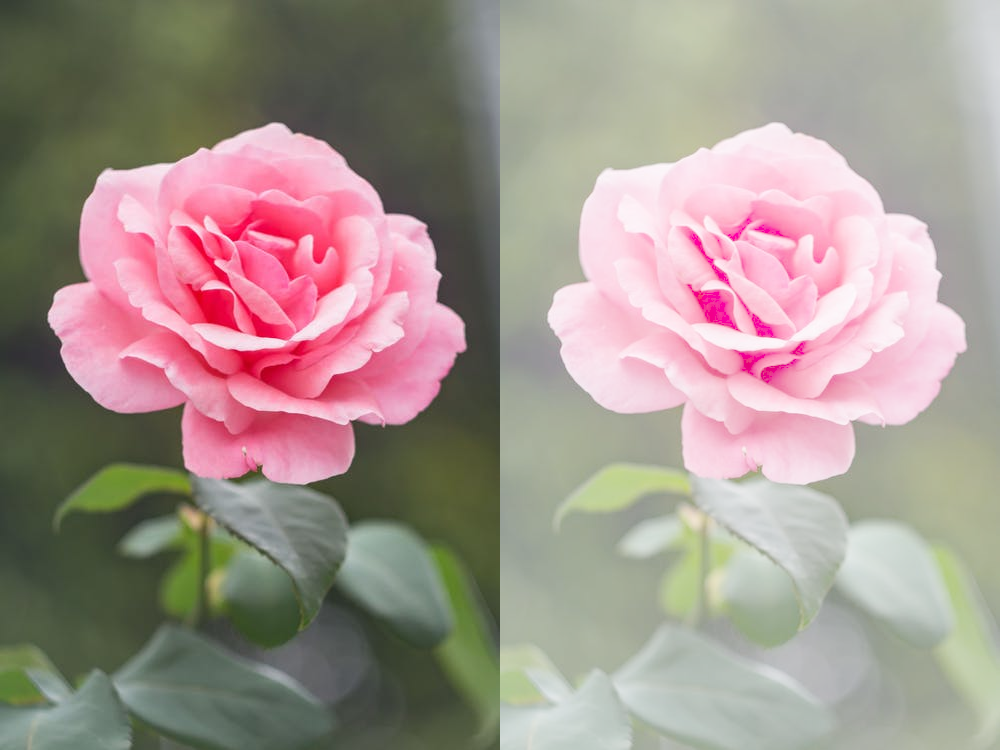

In [15]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np


print(' Gamma Correction pada citra ')
print('----------------------------------')
try:
  gamma = int(input('Input Gamma Value : '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK SMSTR5/rose_pink.png')
gamma_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
      gamma_image[y,x] = 255 * ((original[y,x] / 255) ** (1/gamma))


final_frame = cv.hconcat((original, gamma_image))
cv2_imshow(final_frame)

2. Create Image Depth Simulation
This experiment is used as a simulation of the image quantization process. In image
quantization, pixels can be represented by n-bit depth (default is 8-bit). In an 8-bit pixel,
the possible colors are 256 colors, from 0 (0000 0000) to 255 (1111 1111). On a 7-bit pixel,
the possible colors are 128 colors, from 0 (000 0000) to 127 (111 1111). The possible color
is obtained from the power of 2 the number of bits. If it is 7 bits, then the number of colors
will be 2 7 = 128, etc. Since Visual Studio 2017 only works on 8 bits, this experiment only
manipulates colors so that the number of colors matches their depth. For the 7-bit case,
two 8-bit colors are represented by one 7-bit color. Examples of color pixels 0 and 1 at 8-
bit, represented by color 0 at 7-bit. color pixels 2 and 3 at 8-bit, represented by color 1 at
7-bit, etc.

# **-> Answer**

 Create Image Depth Simulation 
----------------------------------
Input Blur Value: 3


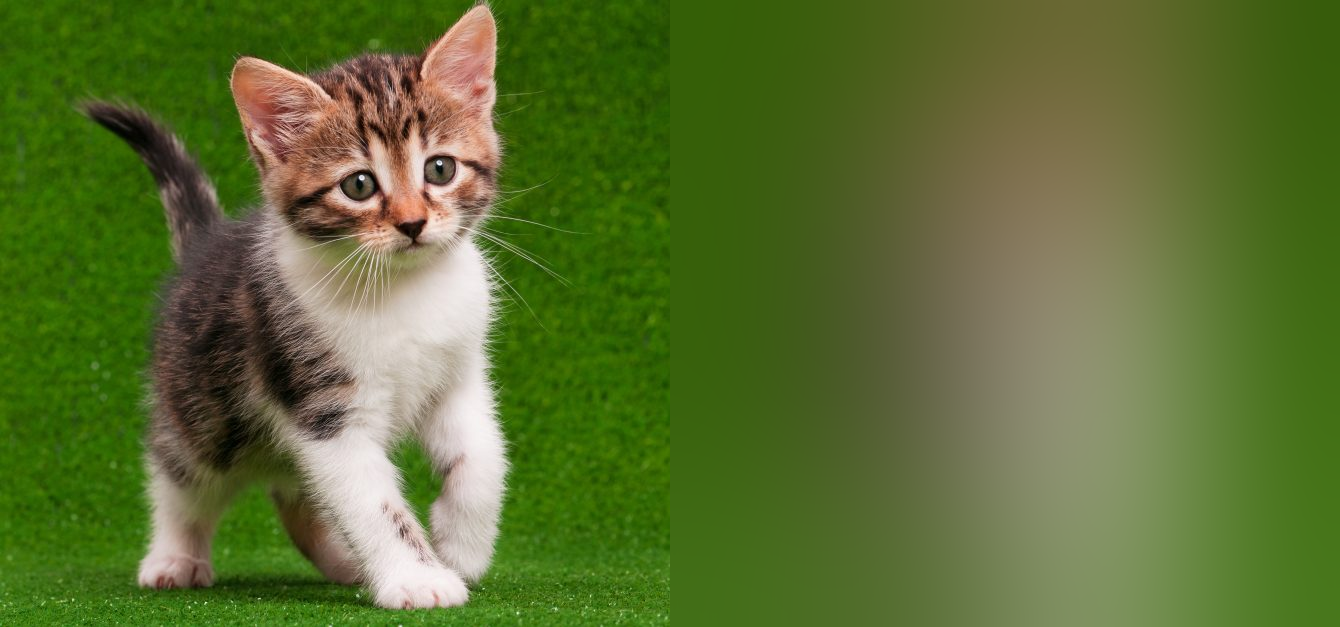

In [16]:
print(' Create Image Depth Simulation ')
print('----------------------------------')
try:
  max_blur_amount = int(input('Input Blur Value: '))
except ValueError:
  print('Error, not a number')

image = cv.imread('/content/drive/MyDrive/PCVK SMSTR5/kitten01.jpg')
depth_map = cv.imread('/content/drive/MyDrive/PCVK SMSTR5/kitten01.jpg')

# Normalize the depth map to the range [0, 1]
depth_map_normalized = depth_map.astype(float) / 255.0

# Calculate the blur amount based on the depth map
blur_amount = (max_blur_amount * depth_map_normalized).astype(np.uint8)

# Apply Gaussian blur to the image using the calculated blur amount
blurred_image = image.copy()  # Create a copy of the original image

# Iterate through each color channel separately
for i in range(3):
    kernel_size = (blur_amount.shape[1], blur_amount.shape[0])

    # Ensure the kernel size is odd
    kernel_size = (kernel_size[0] + 1 if kernel_size[0] % 2 == 0 else kernel_size[0],
                   kernel_size[1] + 1 if kernel_size[1] % 2 == 0 else kernel_size[1])

    blurred_image[:, :, i] = cv.GaussianBlur(image[:, :, i], kernel_size, sigmaX=0)


final_frame = cv.hconcat((image, blurred_image))
cv2_imshow(final_frame)

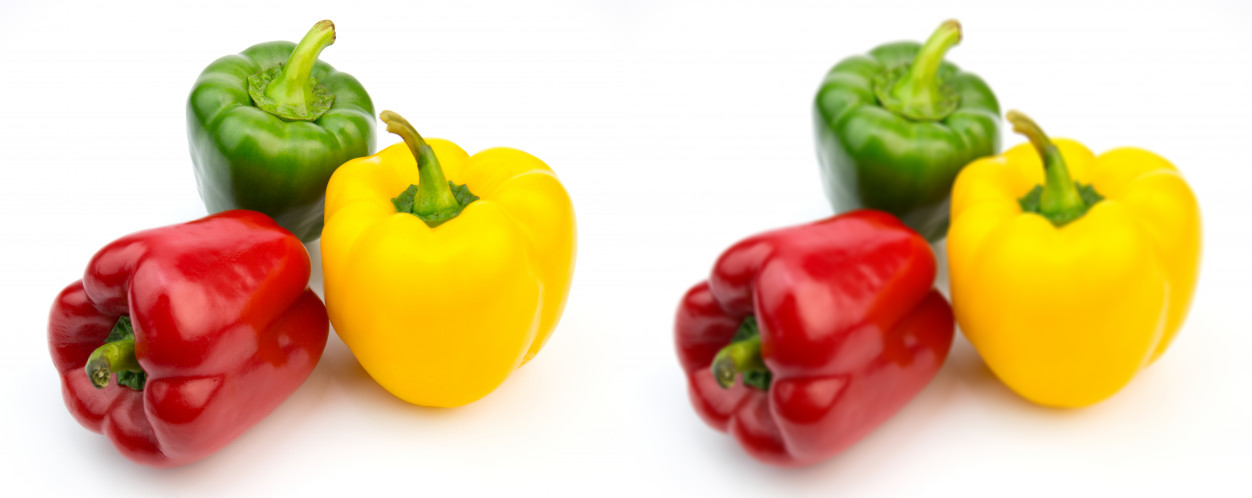

In [17]:
noisy_image = cv.imread('/content/drive/MyDrive/PCVK SMSTR5/peppers.jpg')

# Define the size of the kernel (adjust this based on the desired level of smoothing)
kernel_size = (5, 5)

# Apply the averaging filter to denoise the image
denoised_image = cv.blur(noisy_image, kernel_size)

final_frame = cv.hconcat((noisy_image, denoised_image))
cv2_imshow(final_frame)

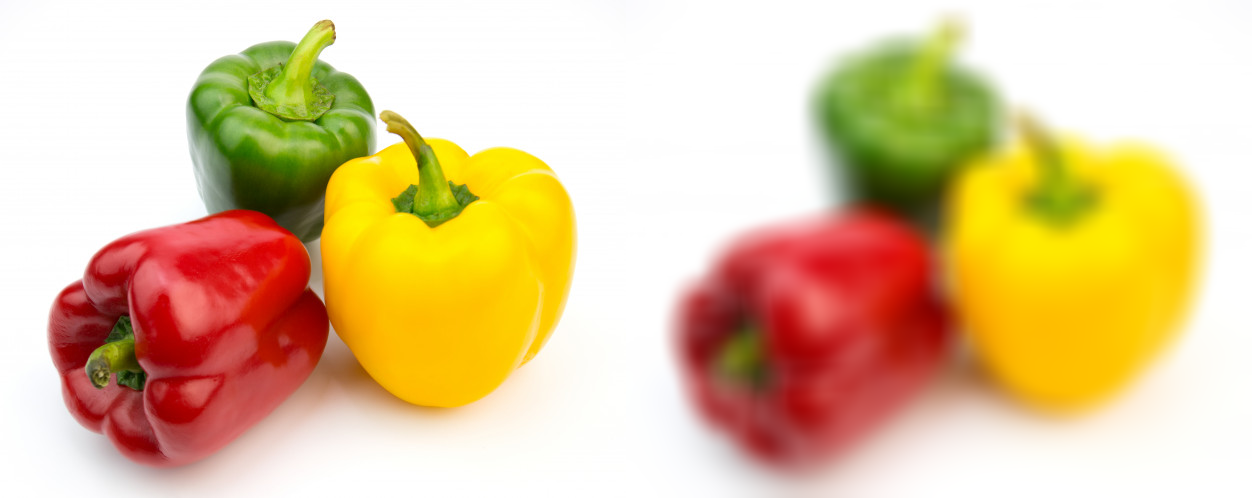

In [18]:
noisy_image = cv.imread('/content/drive/MyDrive/PCVK SMSTR5/peppers.jpg')

# Define the size of the kernel (adjust this based on the desired level of smoothing)
kernel_size = (30, 30)

# Apply the averaging filter to denoise the image
denoised_image = cv.blur(noisy_image, kernel_size)

final_frame = cv.hconcat((noisy_image, denoised_image))
cv2_imshow(final_frame)

# **Number of Blurry Images in Average in 60**

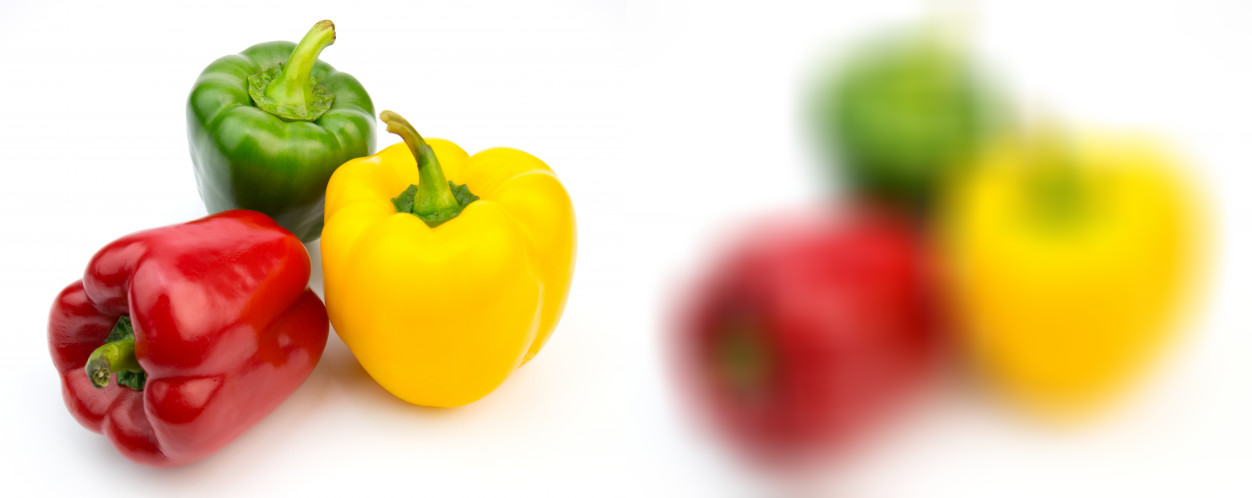

In [19]:
noisy_image = cv.imread('/content/drive/MyDrive/PCVK SMSTR5/peppers.jpg')
# Define the size of the kernel (adjust this based on the desired level of smoothing)
kernel_size = (60, 60)

# Apply the averaging filter to denoise the image
denoised_image = cv.blur(noisy_image, kernel_size)

final_frame = cv.hconcat((noisy_image, denoised_image))
cv2_imshow(final_frame)

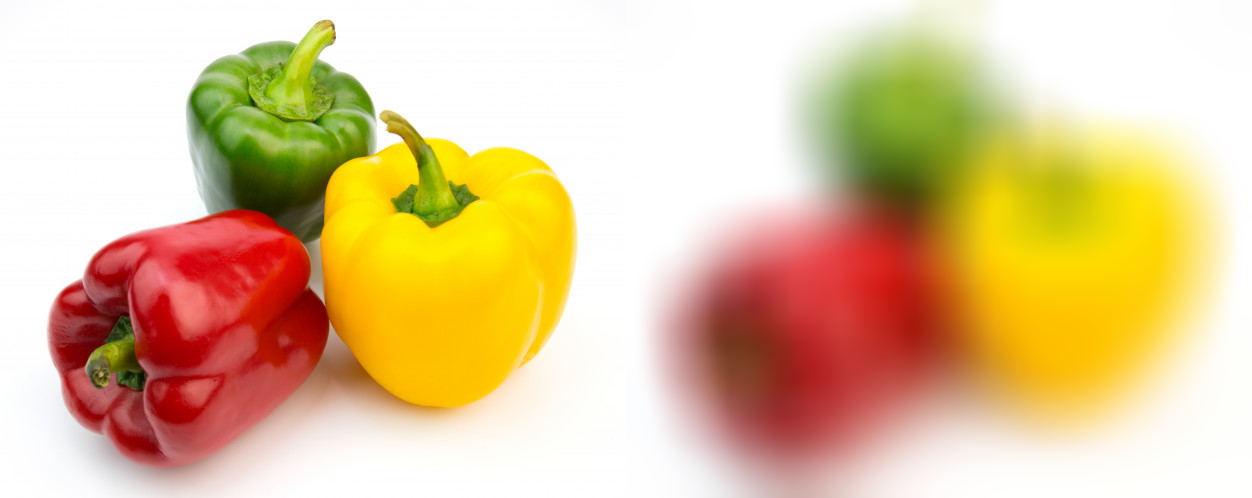

In [20]:
noisy_image = cv.imread('/content/drive/MyDrive/PCVK SMSTR5/peppers.jpg')

# Define the size of the kernel (adjust this based on the desired level of smoothing)
kernel_size = (80, 80)

# Apply the averaging filter to denoise the image
denoised_image = cv.blur(noisy_image, kernel_size)

final_frame = cv.hconcat((noisy_image, denoised_image))
cv2_imshow(final_frame)

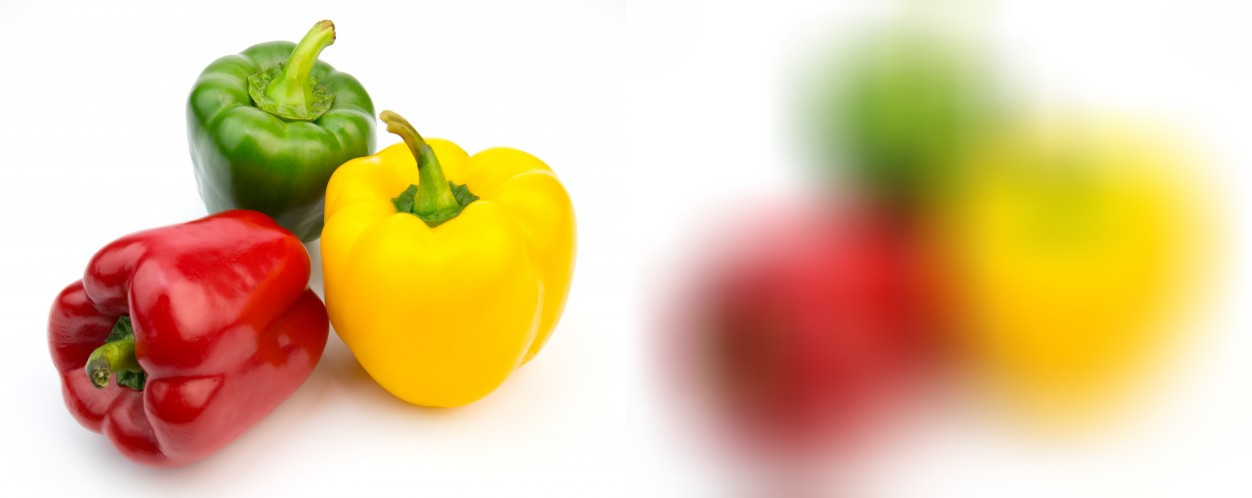

In [21]:
noisy_image = cv.imread('/content/drive/MyDrive/PCVK SMSTR5/peppers.jpg')

# Define the size of the kernel (adjust this based on the desired level of smoothing)
kernel_size = (100, 100)

# Apply the averaging filter to denoise the image
denoised_image = cv.blur(noisy_image, kernel_size)

final_frame = cv.hconcat((noisy_image, denoised_image))
cv2_imshow(final_frame)

Operator :
# OR

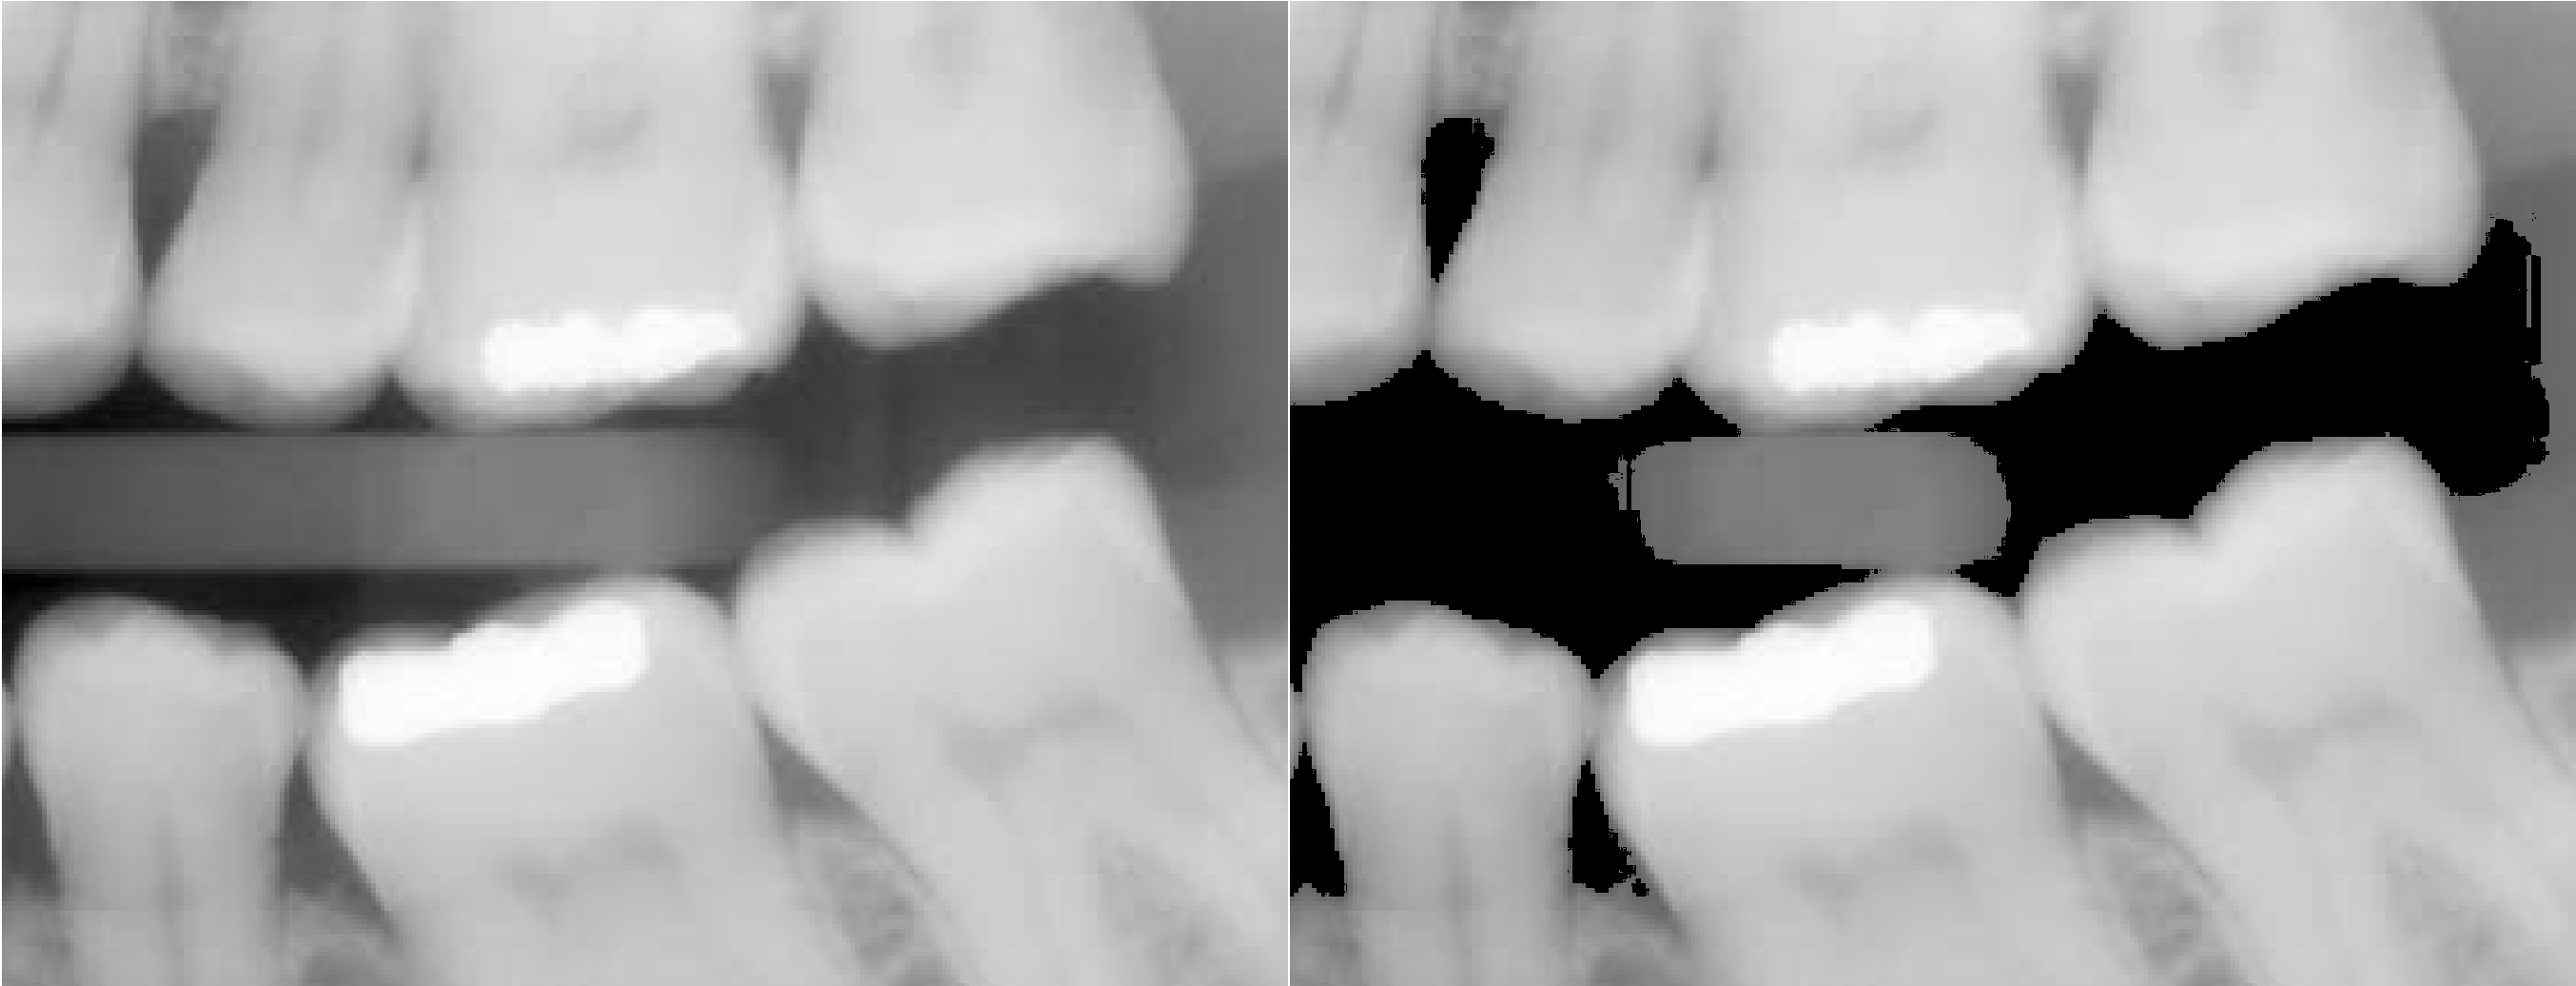

In [22]:
original_image = cv.imread('/content/drive/MyDrive/PCVK SMSTR5/teeth.jpg')
gray_image = cv.cvtColor(original_image, cv.COLOR_BGR2GRAY)

# Create two binary masks using thresholding
ret, mask1 = cv.threshold(gray_image, 100, 255, cv.THRESH_BINARY)
ret, mask2 = cv.threshold(gray_image, 150, 255, cv.THRESH_BINARY)

# Use the OR operator to combine the masks
combined_mask = cv.bitwise_or(mask1, mask2)

# Apply the mask to the original image
masked_image = cv.bitwise_and(original_image, original_image, mask=combined_mask)

final_frame = cv.hconcat((original_image, masked_image))
cv2_imshow(final_frame)

Operator :
# NOT

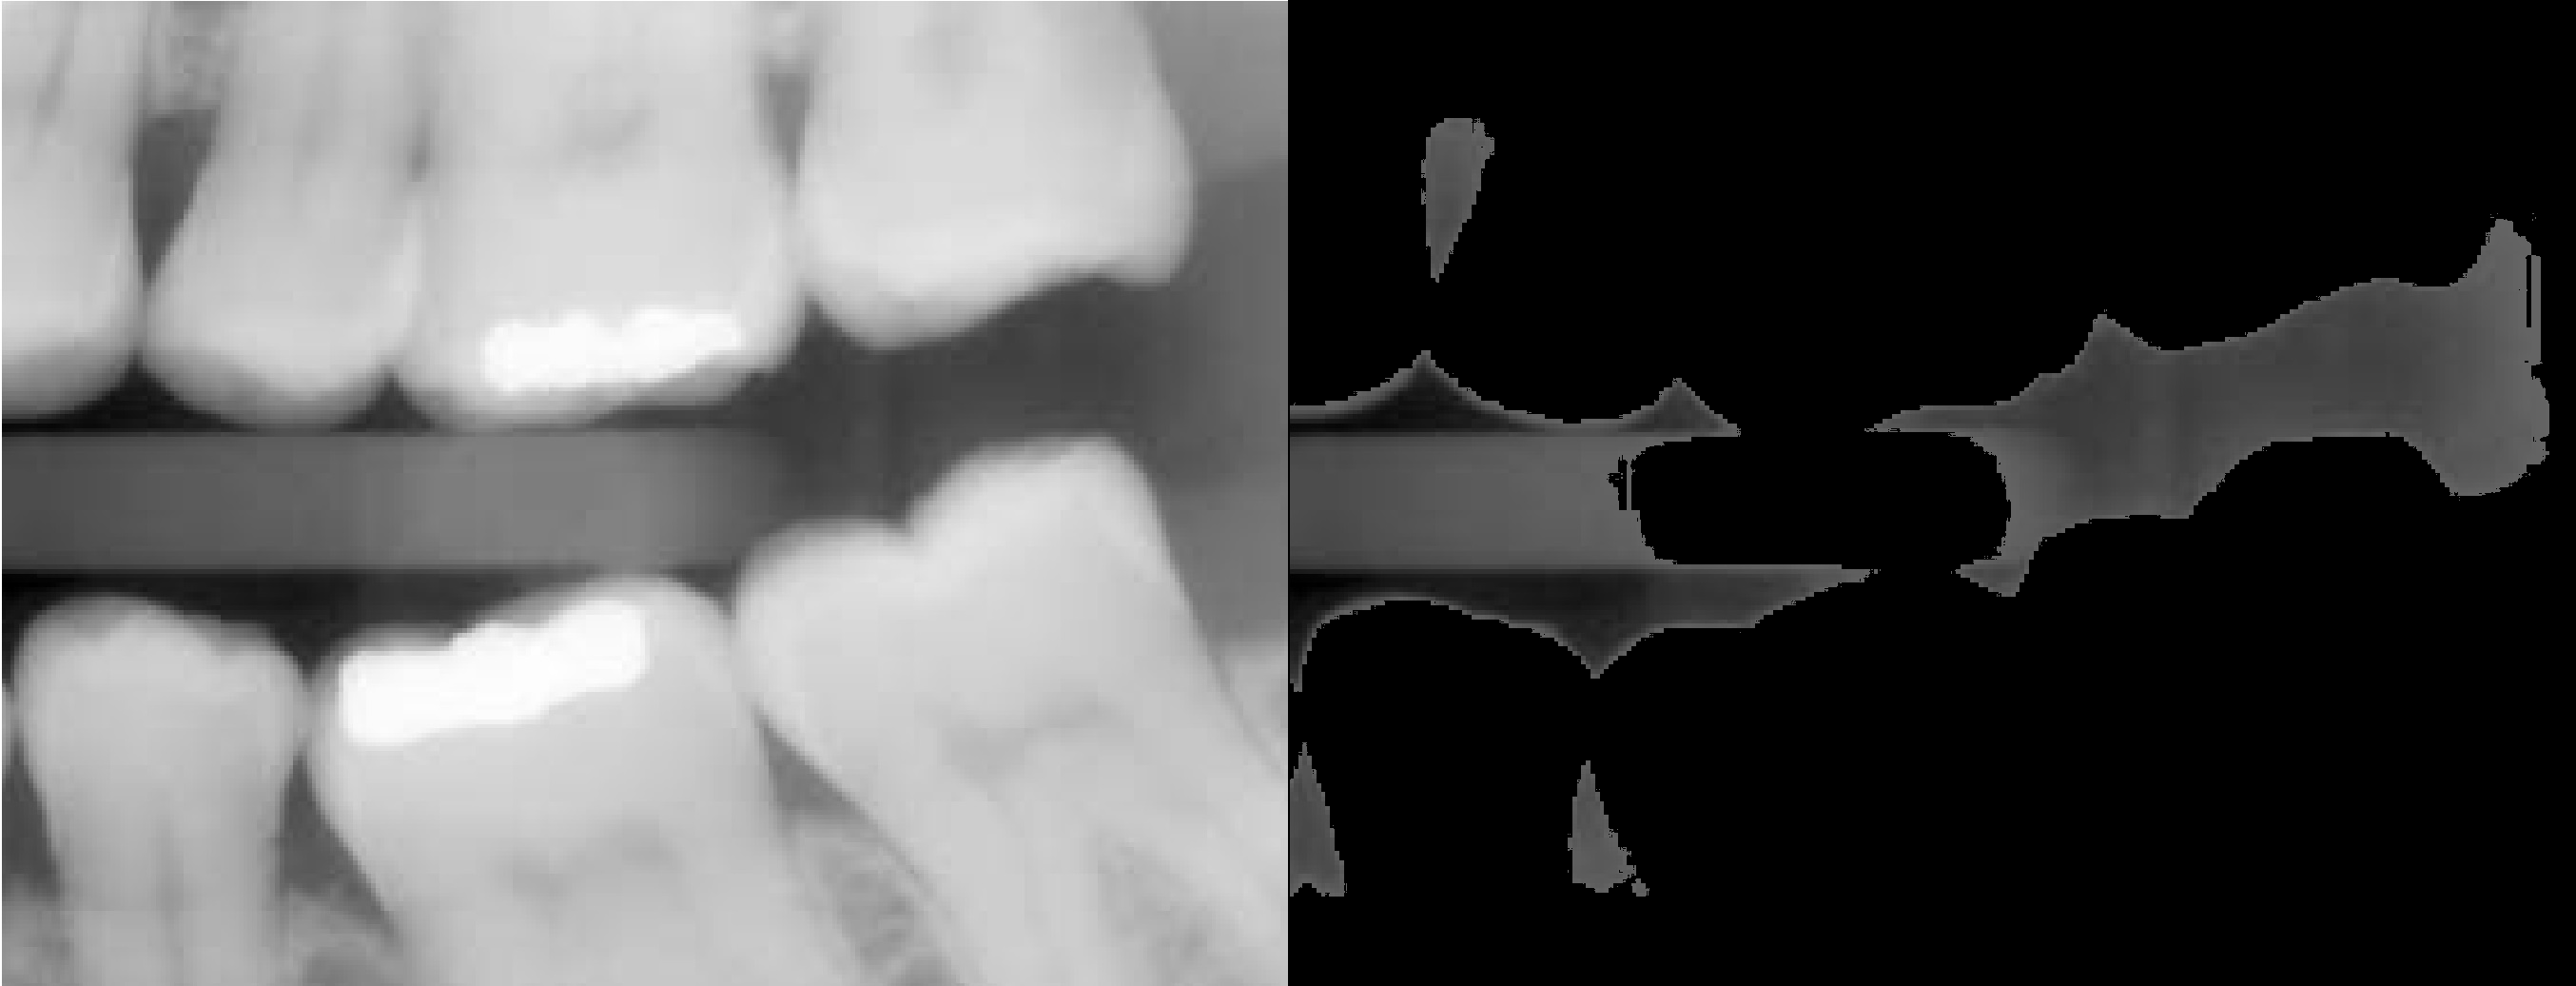

In [23]:
original_image = cv.imread('/content/drive/MyDrive/PCVK SMSTR5/teeth.jpg')
gray_image = cv.cvtColor(original_image, cv.COLOR_BGR2GRAY)

# Create two binary masks using thresholding
ret, mask1 = cv.threshold(gray_image, 100, 255, cv.THRESH_BINARY)
ret, mask2 = cv.threshold(gray_image, 150, 255, cv.THRESH_BINARY)

# Use the OR operator to combine the masks
combined_mask = cv.bitwise_not(mask1, mask2)

# Apply the mask to the original image
masked_image = cv.bitwise_and(original_image, original_image, mask=combined_mask)

final_frame = cv.hconcat((original_image, masked_image))
cv2_imshow(final_frame)

Operator :
# NAND

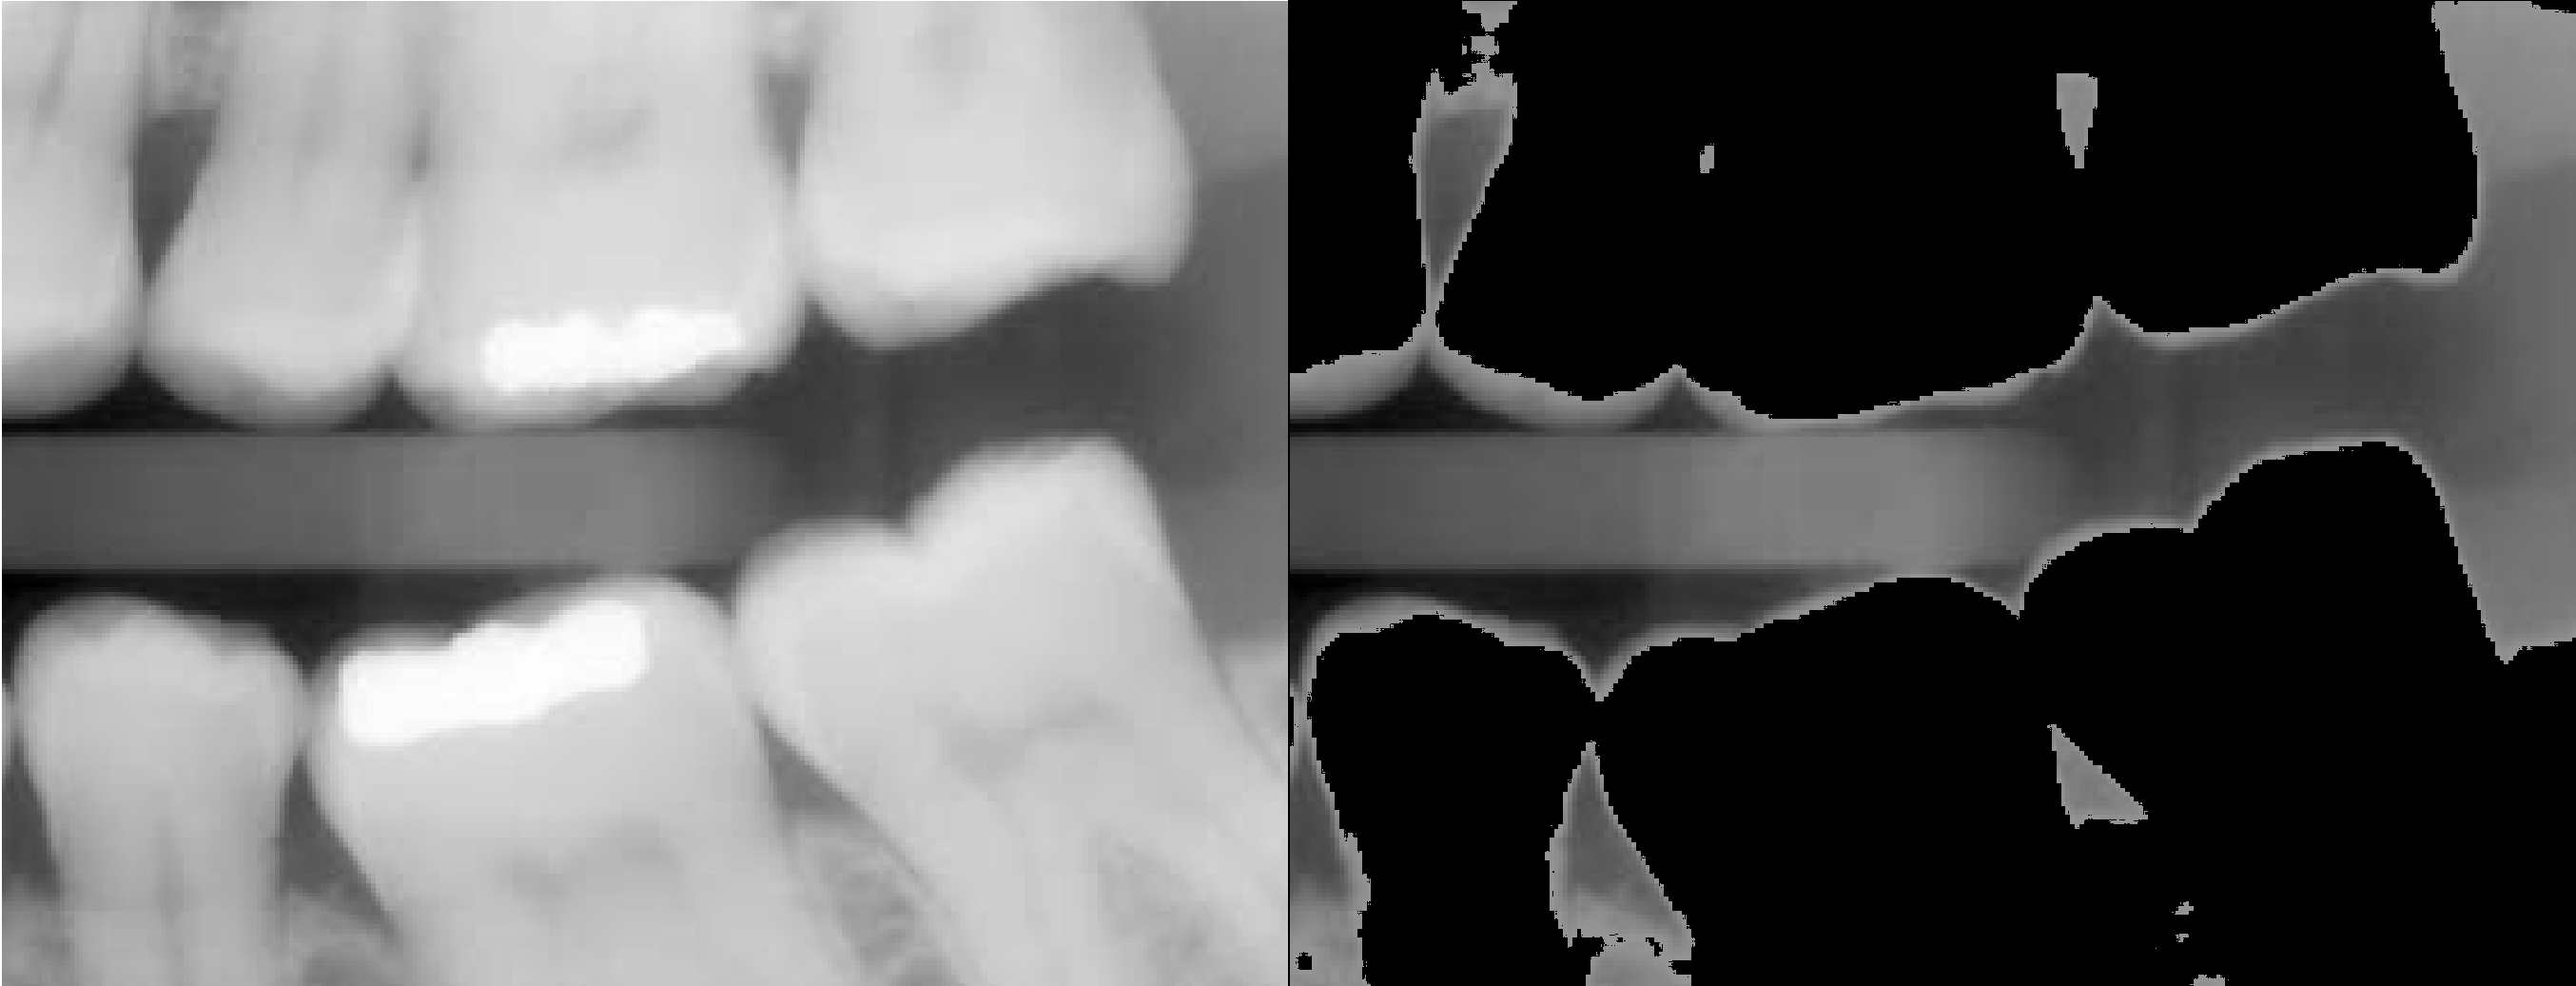

In [24]:
original_image = cv.imread('/content/drive/MyDrive/PCVK SMSTR5/teeth.jpg')
gray_image = cv.cvtColor(original_image, cv.COLOR_BGR2GRAY)

# Create two binary masks using thresholding
ret, mask1 = cv.threshold(gray_image, 100, 255, cv.THRESH_BINARY)
ret, mask2 = cv.threshold(gray_image, 150, 255, cv.THRESH_BINARY)

# Use the NAND operator to combine the masks
nand_mask = cv.bitwise_not(cv.bitwise_and(mask1, mask2))

# Apply the NAND mask to the original image
masked_image = cv.bitwise_and(original_image, original_image, mask=nand_mask)

final_frame = cv.hconcat((original_image, masked_image))
cv2_imshow(final_frame)

Operator :
# XOR

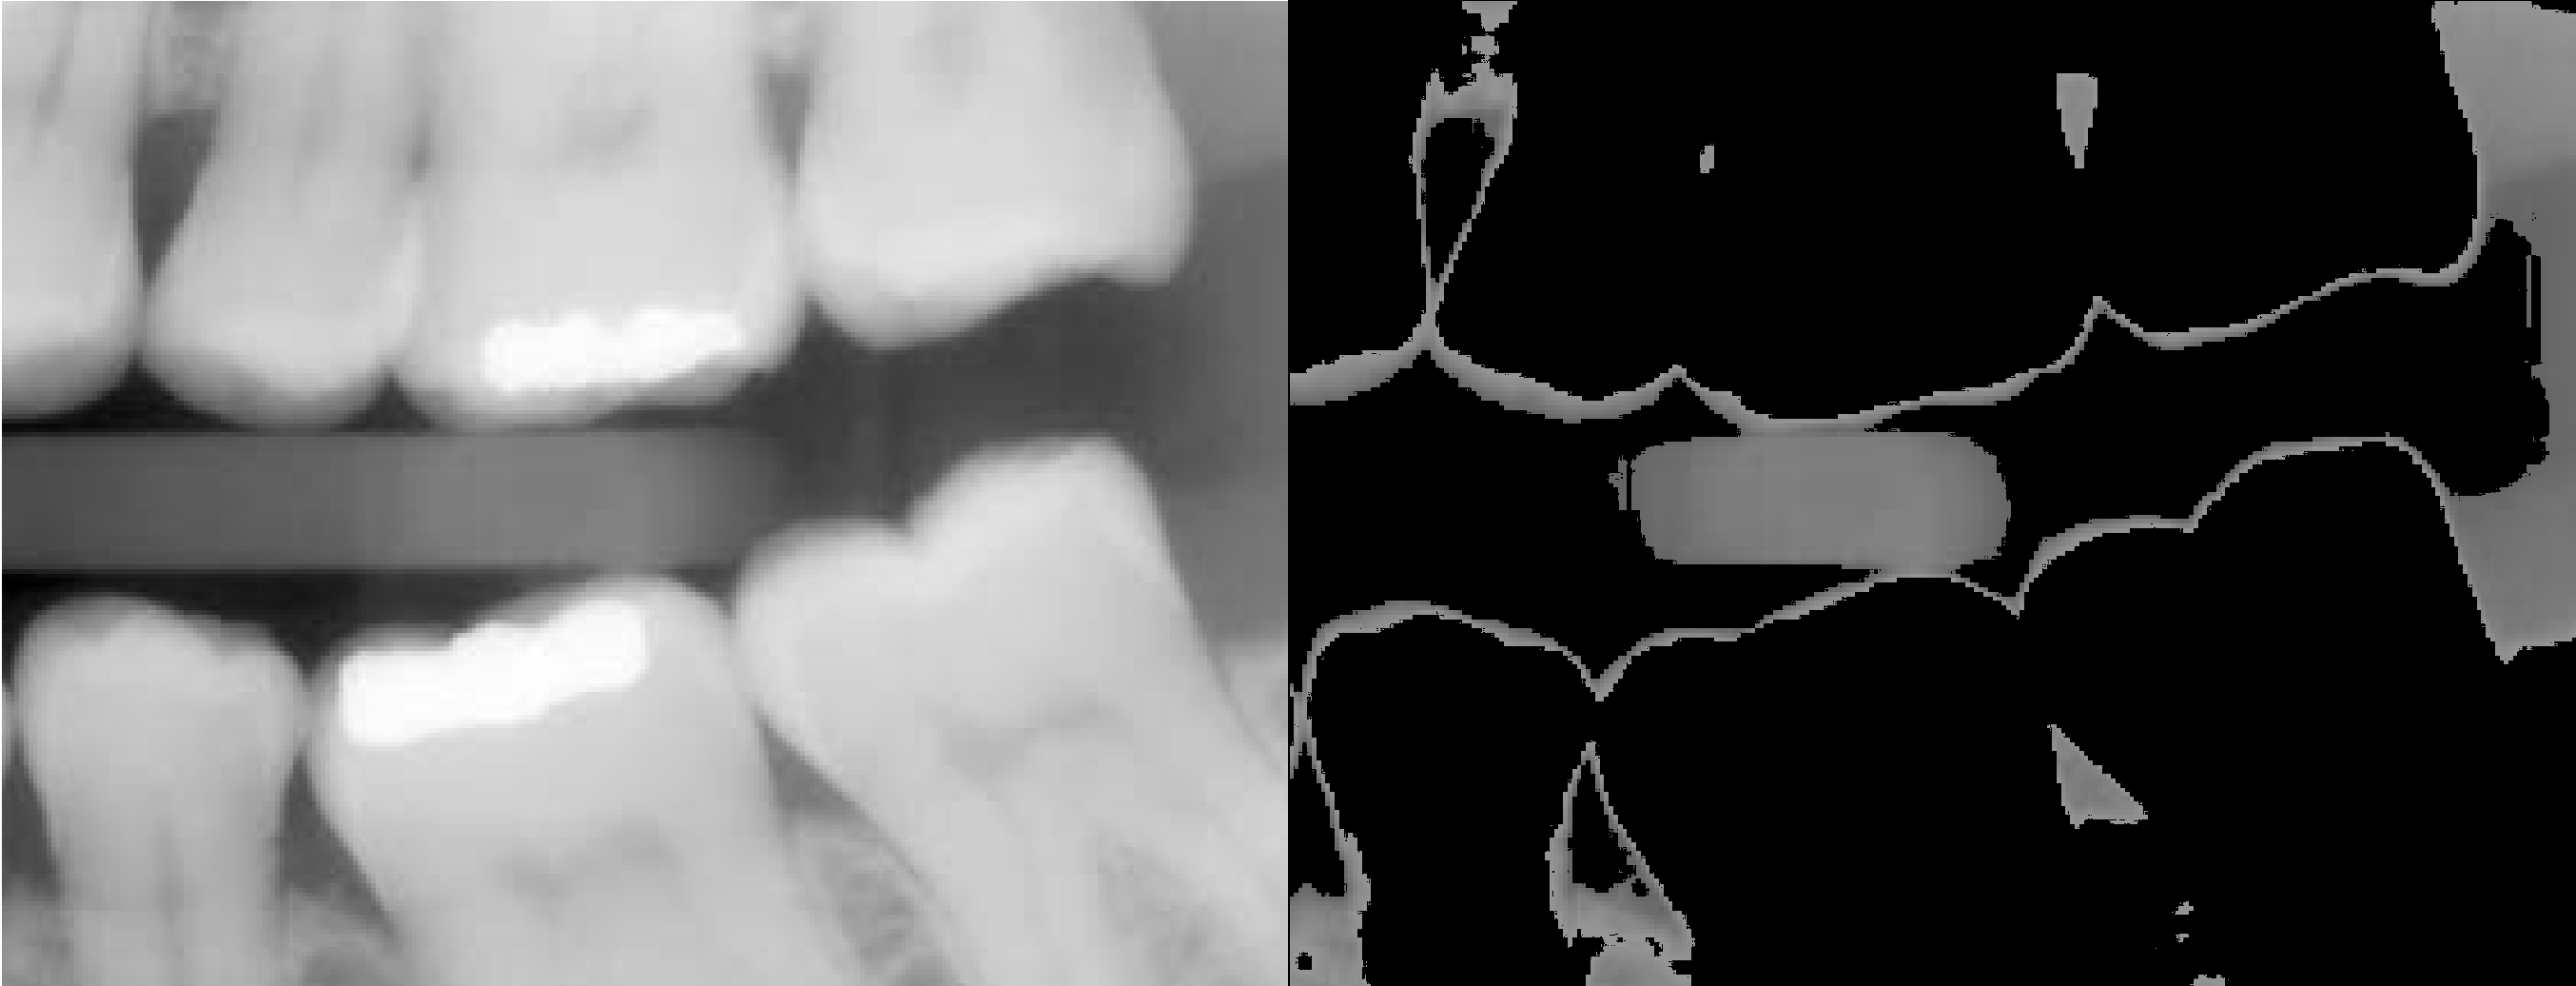

In [25]:
original_image = cv.imread('/content/drive/MyDrive/PCVK SMSTR5/teeth.jpg')
gray_image = cv.cvtColor(original_image, cv.COLOR_BGR2GRAY)

# Create two binary masks using thresholding
ret, mask1 = cv.threshold(gray_image, 100, 255, cv.THRESH_BINARY)
ret, mask2 = cv.threshold(gray_image, 150, 255, cv.THRESH_BINARY)

# Use the XOR operator to combine the masks
xor_mask = cv.bitwise_xor(mask1, mask2)

# Apply the XOR mask to the original image
masked_image = cv.bitwise_and(original_image, original_image, mask=xor_mask)

final_frame = cv.hconcat((original_image, masked_image))
cv2_imshow(final_frame)